<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично, Наталия! Ты здорово поработала над всеми комментариями и теперь твой проект принят.
    
Спасибо за работу и успехов в следующих проектах!)

<div style="border:solid green 2px; padding: 20px">
<b>Привет!</b>

Меня зовут Михаленко Дмитрий, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделала большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование способов увеличения выручки интернет-магазина

Необходимо изучить подготовленный отделом маркетинга список гипотез для увеличения выручки. Среди гипотез должна быть выделена наиболее приоритетная, для проверки которой далее необходимо запустить A/B тест.

Ход исследования:
1. Изучить и приоритизировать гипотезы по по увеличению выручки интернет-магазина.
2. Запустить A/B тест.
3. Проанализировать результаты тестирования и по итогу принять решение об успешности или неуспешности проведенного тестирования.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Коротко обозначила основную цель проекта и ход исследования</div>

## Загрузка и подготовка данных к анализу

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),  # гипотезы
        pd.read_csv('/datasets/orders.csv'),  # заказы
        pd.read_csv('/datasets/visitors.csv')  # посетители
)
except:
    hypothesis, orders, visitors = (
        pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    )

## Часть 1. Приоритизация гипотез

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.replace(' ', '_').str.lower()

Для приоритизации гипотез применим 2 популярных фреймворка, ICE и RICE, и сравним их результаты. Оба фреймворка позволяют количественно оценить идею на основе факторов, влияющих на ее реализацию.

**ICE = Impact * Confidence / Effort**

**RICE = Reach * Impact * Confidence / Effort**

Reach — скольких пользователей затронет изменение, которое вы хотите внести; <br>
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта; <br>
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; <br>
Efforts — сколько стоит протестировать эту гипотезу.

Применим фреймворк ICE для приоритизации гипотез.

In [5]:
#ICE = (impact*confidence)/efforts
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)

#Выведем только гипотезу и значение ICE, выравненные по левому краю
hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending=False).style.set_properties(**{'text-align': 'left'}).format({"ICE": "{:.2f}"})

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо, что показываешь гипотезы целиком и в выводах указываешь их названия </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Но тут значения в ICE вполне можно округлить до второго знака

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Привет! Спасибо за замечание, исправила. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Хорошо)

Наиболее перспективные гипотезы по ICE это:  <br>
- (9-ая): "Запустить акцию, дающую скидку на товар в день рождения", <br>
- (1-ая): "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",  <br>
- (8-ая): "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Применим фреймворк RICE для приоритизации гипотез.

In [6]:
#RICE = (reach*impact*confidence)/efforts
hypothesis['RICE'] = round(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)

#Выведем только гипотезу и значение RICE, выравненные по левому краю
hypothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending=False).style.set_properties(**{'text-align': 'left'}).format({"RICE": "{:.2f}"})

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Также RICE вполне можно округлить

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Исправлено. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Округления добавлены

Наиболее перспективные гипотезы по RICE это:  <br>
- (8-ая): "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", <br>
- (3-ая): "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", <br>
- (1-ая): "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

Оба фреймворка показали, что 1-ая и 8-ая гипотезы входят в топ-3 наиболее приоритетных гипотез. <br>
Однако, 8-ая гипотеза **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** вышла на первое место по методу RICE, т.к. у нее наибольшее значение reach (=10), т.е. наибольшихй охват пользователей. В первую очередь следует начать с проверки именно этой гипотезы.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все здорово </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>  Еще порекомендую в вводной части указать, что в целом означают фреймворки

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Добавила. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Молодец!

## Часть 2. Анализ A/B-теста

Изучим данные с результатами A/B-теста. Проверим, нет ли в данных ошибок.

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков в данных нет. Для удобства переименуем столбцы и приведем даты к формату даты. Так же проверим наличие дублей в обеих таблицах.

In [9]:
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
visitors.columns = visitors.columns.str.replace(' ', '_').str.lower()
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
display(orders.duplicated().sum(), visitors.duplicated().sum())

0

0

In [11]:
display(orders['date'].min(), orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [12]:
display(visitors['date'].min(), visitors['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Классная обработка  и последовательное отображение данных </div>

In [13]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим наличие пользователей, которые оказались в обеих группах в таблице orders.

In [15]:
#Сколько пользователей входят в обе группы
visitor_groups = orders.groupby('visitor_id', as_index = False).agg({'group':'nunique'})
visitor_groups.query('group == 2')['visitor_id'].count()

58

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отличная проверка </div>

In [16]:
#Сколько всего заказов у таких пользователей
orders[orders['visitor_id'].isin(visitor_groups.query('group == 2')['visitor_id'])].shape

(181, 5)

58 пользователей входят и в группу A и в группу B. Эти пользователи совершили 181 заказ. Наличие таких пользователей в данных указывает, что при проведении A/B теста были допущены ошибки. Это может исказить результат исследования.

### Анализ кумулятивных метрик

Построим **график кумулятивной выручки по группам**.

In [17]:
#Создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 

In [18]:
#Получаем агрегированные кумулятивные по дням данные о заказах 

#Решение из тренажера:
#orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#Ниже привожу альтернативный вариант получения кумулятивных данных, чтобы не просто копипастить решение из тренажера. Результаты идентичны.

orders_aggregated = (
    pd.merge(dates_groups, orders, on='group', suffixes=('_group', '_order')) #merge по группе
    .query('date_order <= date_group').groupby(['date_group', 'group']) #оставляем только строки с датами заказов ДО текущей даты в группе
    .agg({'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}) #накопленная сумма, накопленные уник. пользователи, накопл. заказы 
    .reset_index()
    .rename(columns={'date_group': 'date'})
    .sort_values(by=['date','group'])
                    )
orders_aggregated

,date,group,transaction_id,visitor_id,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,44,38,242401
3,2019-08-02,B,45,43,266748
4,2019-08-03,A,68,62,354874
...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398
58,2019-08-30,A,545,493,4022970
59,2019-08-30,B,620,567,5774631
60,2019-08-31,A,557,503,4084803


In [19]:
visitors_aggregated = (
    pd.merge(dates_groups, visitors, on='group', suffixes=('_group', '_visitor')) #merge по группе
    .query('date_visitor <= date_group').groupby(['date_group', 'group']) #оставляем только строки с датами посещений ДО текущей даты в группе
    .agg({'visitors':'sum'}) #накопленное кол-во пользователей
    .reset_index()
    .rename(columns={'date_group': 'date'})
    .sort_values(by=['date','group'])
                    )
visitors_aggregated

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845
...,...,...,...
57,2019-08-29,B,17708
58,2019-08-30,A,18037
59,2019-08-30,B,18198
60,2019-08-31,A,18736


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Уникальные пары сформированы, получены агрегированные данные, молодец!</div>

In [20]:
# объединяем кумулятивные данные по дням в одной таблице
cumulative_data = pd.merge(orders_aggregated, visitors_aggregated, on=['date', 'group'])
#переименовываем столбцы
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# датафрейм с кумулятивными данными по дням в группе А
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
# датафрейм с кумулятивными данными по дням в группе B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

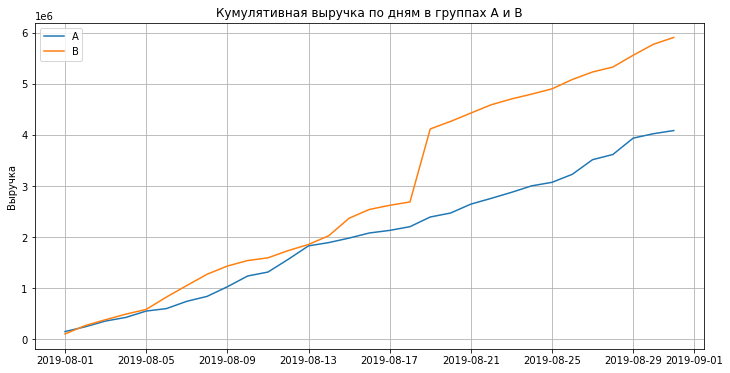

In [21]:
#Построим графики выручки по группам
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue'], label='B')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по дням в группах A и B')
plt.grid(True)
plt.legend();

Из графика видно, что в середине теста группа B вырвалась вперед по показателям и сохранила разрыв вплоть до завершения тестирования. Велика вероятность, что в данных по заказам есть аномальные заказы (по сумме или количеству), которые влияют на полученный результат.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Аномалии хорошо зафиксированы и молодец, что предлагаешь возможные причины их возникновения.</div>

Построим **график кумулятивного среднего чека по группам**.

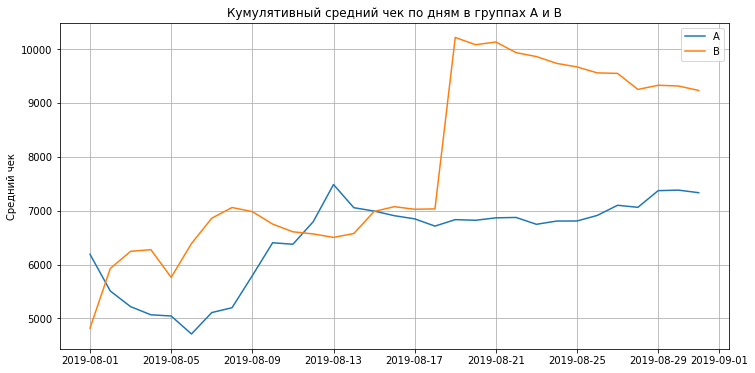

In [22]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue']/cumulative_data_A['orders'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue']/cumulative_data_B['orders'], label='B')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по дням в группах A и B')
plt.grid(True)
plt.legend();

Кумулятивное значение среднего чека по сегментам сильно колеблется. Отчетливо заметен скачок показателей для группы B во второй половине теста. Это еще один довод в пользу дополнительного анализа выбросов, которые могут искажать средний чек.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Вполне логично. Очевидно, здесь есть влияние выбросов</div>

Построим **график относительного изменения кумулятивного среднего чека группы B к группе A**.

In [23]:
#формируем общий датафрейм для обеих групп
merged_cumulative_data = pd.merge(cumulative_data_A, cumulative_data_B, on='date', how='left', suffixes=['A', 'B'])

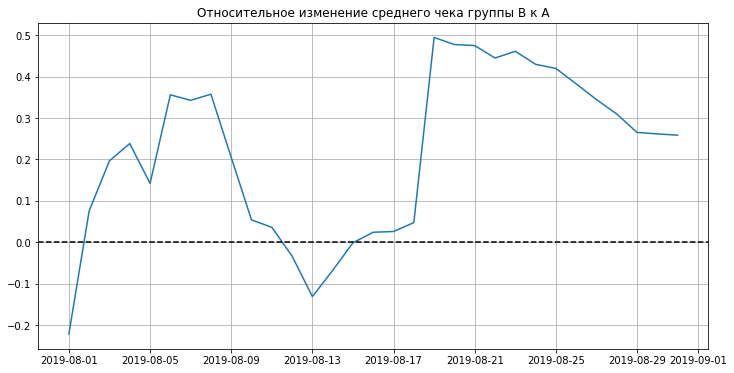

In [24]:
plt.figure(figsize=(12, 6))
#кумулятивная метрика группы B / кумулятивная метрика группы A - 1
plt.plot(merged_cumulative_data['date'], (merged_cumulative_data['revenueB']/merged_cumulative_data['ordersB'])/(merged_cumulative_data['revenueA']/merged_cumulative_data['ordersA'])-1)
plt.title('Относительное изменение среднего чека группы B к A')
plt.grid(True)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

По графику относительного изменения заметны резкие скачки в значениях средних чеков по группам. Можно предположить, что в эти даты происходили аномальные заказы.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично, отдельно отмечу отображение оси X, она повышает наглядность</div>

Построим **график кумулятивного среднего количества заказов по группам**.

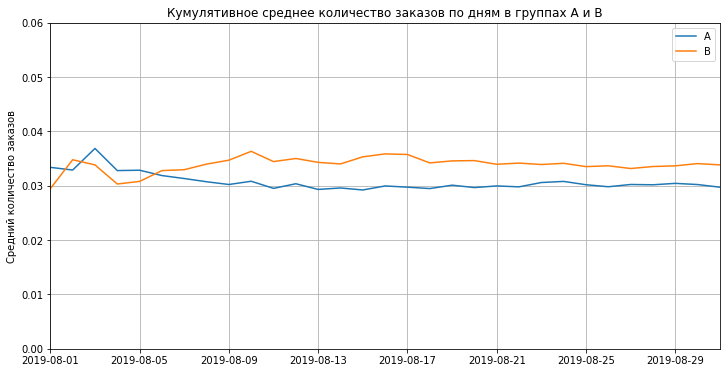

In [25]:
#Построим графики среднего количества заказов по группам — разделим число заказов на количество поситетелей
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data_A['date'], cumulative_data_A['orders']/cumulative_data_A['visitors'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['orders']/cumulative_data_B['visitors'], label='B')
plt.ylabel('Средний количество заказов')
plt.title('Кумулятивное среднее количество заказов по дням в группах A и B')
plt.grid(True)
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.06])
plt.legend();

В начале теста заметны колебания конверсии групп A и B, но к концу теста значения выровнялись около своего среднего.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Согласен, после всплеска группы шли достаточно ровно</div>

Построим **график относительного изменения кумулятивного среднего количества заказов группы B к группе A**.

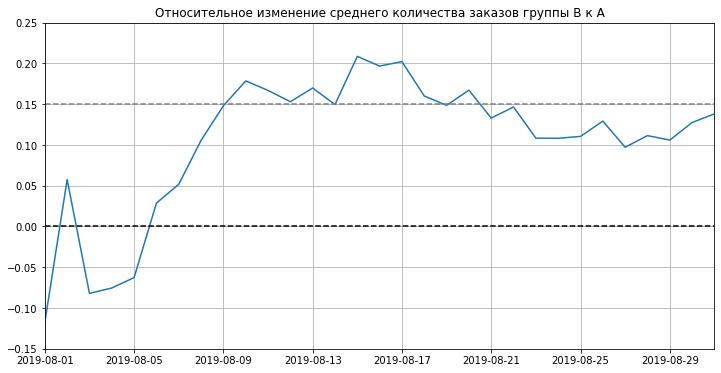

In [26]:
plt.figure(figsize=(12, 6))
#кумулятивная метрика группы B / кумулятивная метрика группы A - 1
plt.plot(merged_cumulative_data['date'], (merged_cumulative_data['ordersB']/merged_cumulative_data['visitorsB'])/(merged_cumulative_data['ordersA']/merged_cumulative_data['visitorsA'])-1)
plt.title('Относительное изменение среднего количества заказов группы B к A')
plt.grid(True)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.15, 0.25] );

С самого начала показатели конверсии группы B лидируют над показателями группы A. Значение прироста конверсии группы B относительно группы A колеблется около 15%.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Здорово, также удобные для восприятия горизонтальные линии</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В этой части ты здорово разобралась с кумулятивными метриками - их расчетом и интерпретацией; действительно, нам нужно проверить данные на аномальные значения (кстати, в реальных проектах рекомендую проверять аномалии на стадии знакомства с данными - это позволит избежать невынужденных ошибок при их изучении).</div>

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Поняла, спасибо за совет! </div>

### Проверка данных на аномалии

Построим **точечный график количества заказов по пользователям**.

Для наглядности построим гистограмму и диаграмму рассеяния, по которым поймем, есть ли в данных аномалии. Для этого рассчитаем какое количество заказов совершил каждый пользователь.

In [27]:
orders_by_visitors = orders.groupby('visitor_id').agg({'transaction_id': 'nunique'}).reset_index()
orders_by_visitors.columns = ['visitor_id', 'orders']

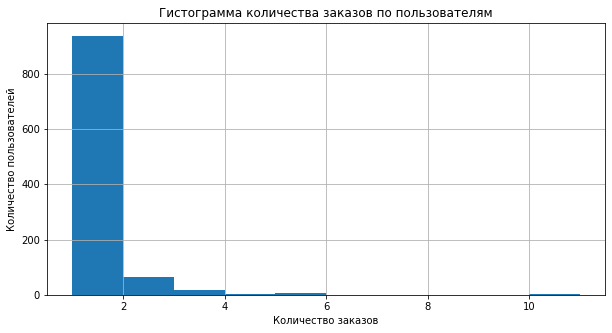

In [28]:
plt.figure(figsize=(10, 5))
orders_by_visitors['orders'].hist()
plt.title('Гистограмма количества заказов по пользователям')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.grid(True);

Большинство пользователей оформляют 1 заказ.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо</div>

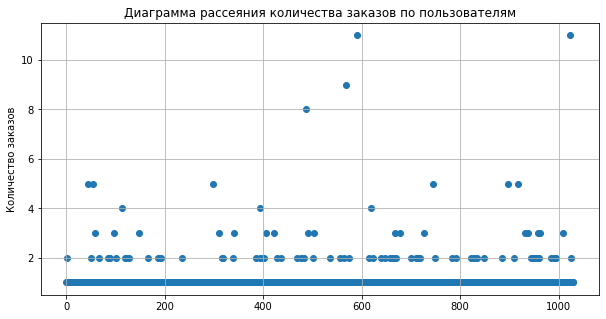

In [29]:
# серия из чисел от 0 до количества наблюдений в orders_by_visitor
x_values = pd.Series(range(0, len(orders_by_visitors)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_visitors['orders'])
plt.title('Диаграмма рассеяния количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.grid(True);

Как видим, мало пользователей оформляют более 2-х заказов. Данные по пользователям, совершившим более 2-х заказов, могут попадать под определение аномалии. Для проверки этой гипотезы рассчитаем 95-й и 99-й перцентили количества заказов по пользователям.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Совершенно верно, перцентили тут помогут</div>

In [30]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
orders_percentile = np.percentile(orders_by_visitors['orders'], [95, 99])
orders_percentile

array([2., 4.])

Как видим, не более 1% пользователей совершали более 4-х заказов и не более 5% пользователей совершали более 2-х заказов. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Корректная интерпретация</div>

Построим **точечный график стоимостей заказов**. 

Аналогично построим гистограмму и диаграмму рассеяния, по которым поймем, есть ли в данных аномалии.

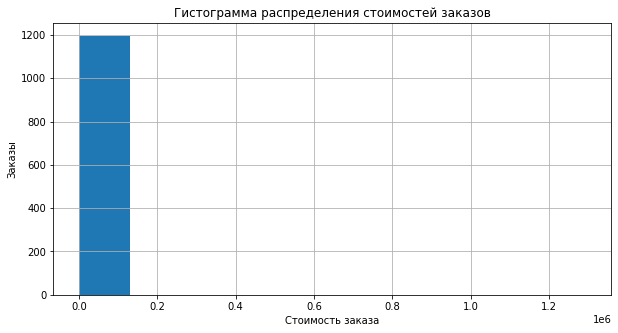

In [31]:
plt.figure(figsize=(10, 5))
orders['revenue'].hist()
plt.title('Гистограмма распределения стоимостей заказов')
plt.ylabel('Заказы')
plt.xlabel('Стоимость заказа')
plt.grid(True);

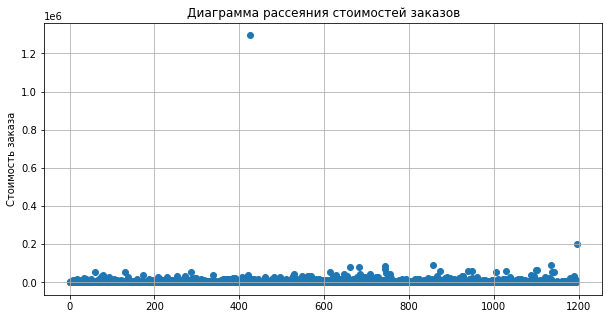

In [32]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма рассеяния стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.grid(True);

Большинство заказов по стоимости не превышают 50 тыс. руб. Так же видим явную аномалию в виде заказа на сумму >1 млн. руб. 
Рассчитаем 95-й и 99-й перцентили стоимости заказов.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, тут есть аномалии</div>

In [33]:
revenue_percentile = np.percentile(orders['revenue'], [95, 99])
revenue_percentile

array([28000. , 58233.2])

Не более 1% заказов приходятся на сумму более 58 тыс. руб. и не более 5% заказов превышают 28 тыс. руб.

Примем за **аномальных пользователей** тех, кто совершил более 2-х заказов или совершил заказ на сумму свыше 28 000 рублей.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Вполне оправданно</div>

### Расчет статистической значимости

Посчитаем **статистическую значимость различий в среднем количестве заказов между группами**, пока не удаляя аномальных пользователей.

Сформулируем гипотезы. <br>
Нулевая гипотеза H0: различий в среднем количестве заказов между группами нет. Альтернативная H1: различия в среднем между группами есть.
Уровень значимости = 0.05.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Гипотезы сформулированы</div>

In [34]:
#Вычисляем какое количество заказов совершил каждый пользователь
orders_by_visitors_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_visitors_A.columns = ['visitor_id', 'orders']

orders_by_visitors_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_visitors_B.columns = ['visitor_id', 'orders']

In [35]:
#Получим последовательность, которая будет содержать количество заказов, совершенных каждым пользователем. 
#Для остальных пользователей (посетителей) на месте суммы будет 0
sample_A = (
    pd.concat([orders_by_visitors_A['orders'], 
               pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_visitors_A['orders'])),
                         name='orders')],axis=0)
           )

sample_B = (
    pd.concat([orders_by_visitors_B['orders'], 
               pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_visitors_B['orders'])),
                         name='orders')],axis=0)
           )

Для проверки гипотезы проведем тест Манна-Уитни, т.к. исходные данные распределены не нормально и в них много выбросов (аномальное количество заказов, аномальные суммы заказов и т.д.).

In [36]:
print("p_value:", round(stats.mannwhitneyu(sample_A, sample_B)[1], 2))

p_value: 0.02


In [37]:
#относительный прирост среднего числа заказов группы B
round((sample_B.mean() / sample_A.mean() - 1)*100, 2)

13.81

P_value меньше уровня значимости, поэтому нулевую гипотезу отвергаем. Это говорит о том, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов группы B к конверсии группы A равен 13.8%.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Тест проводишь как надо, хорошо</div>

Посчитаем **статистическую значимость различий в среднем чеке заказа между группами**, не удаляя аномальных пользователей.

Сформулируем гипотезы. <br>
Нулевая гипотеза H0: различий в среднем чеке между группами нет. Альтернативная H1: различия в среднем между группами есть.
Уровень значимости = 0.05. Применим так же тест Манна-Уитни.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Гипотезы также определены</div>

In [38]:
print("p_value:", round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], 2))

p_value: 0.73


In [39]:
#относительный прирост среднего чека группы B
round((orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1)*100, 2)

25.87

P-value больше уровня значимости, нулевую гипотезу отвернуть не удалось. Это говорит о том, что нет оснований считать, что в среднем чеке есть различия между группами. Различия между рассчитанными средними чеками групп A и B получены случайным образом.

<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера ❌:</b> Наталия, обрати, пожалуйста, внимание на выводы: `P-value значительно больше уровня значимости, нулевую гипотезу отвернуть не удалось. Это говорит о том, что нет оснований считать, что в среднем чеке есть различия между группами.` - тут вывод верный, но мы не знаем, значительно больше p-value или нет, оно просто больше, т.е. корректнее писать `P-value 0.73 больше 0.05, значит...`. Мы ведь фактически не можем сказать с какого момента настало это "значительно"
    
Хорошо - идем дальше, в выводе выше мы говорим, что различий нет, т.е. стат. значимых различий между выборками нет. Но, дальше: `При этом средний чек группы B на 25% превышает сердний чек группы A.`. Стоп, нет, это не так. Если `p-value > alpha` значит  Средний чек группы B <b>равен</b> среднему чеку группы A (или не отличается или различия получены случайным образом) и он не может <b>превышать</b> средний чек группы A.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Поняла, спасибо, скорректировала вывод.  </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Теперь по выводу все безупречно

Повторим эти же тесты с тем же уровнем значимости, но уже на очищенных от аномалий данных. 

Ранее определили, что за аномальных пользователей примем тех, кто совершил более 2-х заказов или совершил заказ на сумму свыше 28 000 рублей. Проверим сколько таких пользователей.

In [40]:
pd.concat([orders_by_visitors_A[orders_by_visitors_A['orders'] > orders_percentile[0]]['visitor_id'], 
           orders_by_visitors_B[orders_by_visitors_B['orders'] > orders_percentile[0]]['visitor_id'], 
           orders[orders['revenue'] > revenue_percentile[0]]['visitor_id']], axis=0).nunique()

74

Всего 74 аномальных пользователя.

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Лучше не указывать числа напрямую, а обращаться к ним через переменную или перцентиль. В таком случае, если данные изменятся нам не нужно будет корректировать код

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Исправила. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Хорошо)

In [41]:
abnormal_visitors = pd.concat([orders_by_visitors_A[orders_by_visitors_A['orders'] > orders_percentile[0]]['visitor_id'], 
                               orders_by_visitors_B[orders_by_visitors_B['orders'] > orders_percentile[0]]['visitor_id'], 
                               orders[orders['revenue'] > revenue_percentile[0]]['visitor_id']]
                              , axis=0).drop_duplicates()

Посчитаем **статистическую значимость различия среднего количества заказов после удаления аномальных пользователей**.

Нулевая гипотеза H0: различий в среднем количестве заказов между группами нет. Альтернативная H1: различия в среднем между группами есть. Уровень значимости = 0.05.

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Все же стоило бы указать гипотезы еще раз

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Указала. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично!

In [42]:
#Получим последовательность, которая будет содержать количество заказов, совершенных каждым пользователем. 
#Для остальных пользователей (посетителей) на месте суммы будет 0
sample_A_filtered = (
    pd.concat([orders_by_visitors_A.query('visitor_id not in @abnormal_visitors')['orders'], 
               pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_visitors_A['orders'])),
                         name='orders')],axis=0)
           )

sample_B_filtered = (
    pd.concat([orders_by_visitors_B.query('visitor_id not in @abnormal_visitors')['orders'], 
               pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_visitors_B['orders'])),
                         name='orders')],axis=0)
           )

In [43]:
print("p_value:", round(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1], 2))

p_value: 0.01


In [44]:
#относительный прирост среднего числа заказов группы B
round((sample_B_filtered.mean() / sample_A_filtered.mean() - 1)*100, 2)

17.27

P_value все так же меньше уровня значимости, поэтому нулевую гипотезу отвергаем. Значит, в среднем количестве заказов между группами A и B все же есть различия, причем показатели группы B значительно лучше группы A: относительный прирост среднего количества заказов группы B к конверсии группы A равен 17.3%.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично, все верно</div>

Посчитаем **статистическую значимость различия среднего чека после удаления аномальных пользователей**.

Нулевая гипотеза H0: различий в среднем чеке между группами нет. Альтернативная H1: различия в среднем между группами есть.
Уровень значимости = 0.05.

In [45]:
print("p_value:", round(stats.mannwhitneyu(orders.query('visitor_id not in @abnormal_visitors & group == "A"')['revenue'], orders.query('visitor_id not in @abnormal_visitors & group == "B"')['revenue'])[1], 2))

p_value: 0.74


In [46]:
#относительный прирост среднего чека группы B
round((orders.query('visitor_id not in @abnormal_visitors & group == "B"')['revenue'].mean() / orders.query('visitor_id not in @abnormal_visitors & group == "A"')['revenue'].mean() - 1)*100, 2)

-1.96

P-value остался почти без изменений, все так же подтверждая гипотезу, что нет различий в средних чеках между группами.

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> В целом, так гораздо корректнее, но лучше все же сделать упор на том, что статистикой потдвержено, что различия в группах получены случайным образом

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Понятно, удалила лишнее в выводе. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Все верно)

Построим графики относительного изменения конверсии и среднего чека группы B к группе A на очищенных данных.

In [47]:
orders_aggregated_filtered = (
    pd.merge(dates_groups, orders.query('visitor_id not in @abnormal_visitors'), on='group', suffixes=('_group', '_order')) #merge по группе
    .query('date_order <= date_group').groupby(['date_group', 'group']) #оставляем только строки с датами заказов ДО текущей даты в группе
    .agg({'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}) #накопленная сумма, накопленные уник. пользователи, накопл. заказы 
    .reset_index()
    .rename(columns={'date_group': 'date'})
    .sort_values(by=['date','group'])
                    )
visitors_aggregated_filtered = (
    pd.merge(dates_groups, visitors, on='group', suffixes=('_group', '_visitor')) #merge по группе
    .query('date_visitor <= date_group').groupby(['date_group', 'group']) #оставляем только строки с датами посещений ДО текущей даты в группе
    .agg({'visitors':'sum'}) #накопленное кол-во пользователей
    .reset_index()
    .rename(columns={'date_group': 'date'})
    .sort_values(by=['date','group'])
                    )
# объединяем кумулятивные данные по дням в одной таблице
cumulative_data_filtered = pd.merge(orders_aggregated_filtered, visitors_aggregated_filtered, on=['date', 'group'])
#переименовываем столбцы
cumulative_data_filtered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# датафрейм с кумулятивными данными по дням в группе А
cumulative_data_A_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='A']
# датафрейм с кумулятивными данными по дням в группе B
cumulative_data_B_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='B']
#формируем общий датафрейм для обеих групп
merged_cumulative_data_filtered = pd.merge(cumulative_data_A_filtered, cumulative_data_B_filtered, on='date', how='left', suffixes=['A', 'B'])

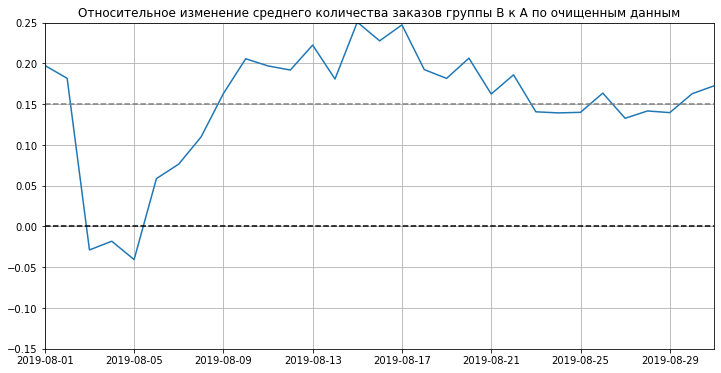

In [48]:
plt.figure(figsize=(12, 6))
#кумулятивная метрика группы B / кумулятивная метрика группы A - 1
plt.plot(merged_cumulative_data_filtered['date'], (merged_cumulative_data_filtered['ordersB']/merged_cumulative_data_filtered['visitorsB'])/(merged_cumulative_data_filtered['ordersA']/merged_cumulative_data_filtered['visitorsA'])-1)
plt.title('Относительное изменение среднего количества заказов группы B к A по очищенным данным')
plt.grid(True)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.15, 0.25] );

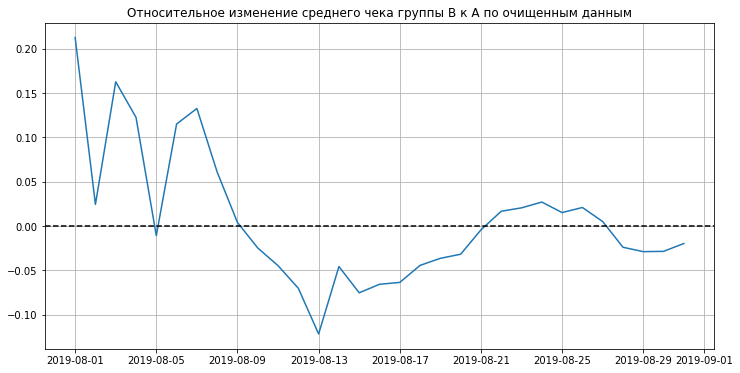

In [49]:
plt.figure(figsize=(12, 6))
#кумулятивная метрика группы B / кумулятивная метрика группы A - 1
plt.plot(merged_cumulative_data_filtered['date'], (merged_cumulative_data_filtered['revenueB']/merged_cumulative_data_filtered['ordersB'])/(merged_cumulative_data_filtered['revenueA']/merged_cumulative_data_filtered['ordersA'])-1)
plt.title('Относительное изменение среднего чека группы B к A по очищенным данным')
plt.grid(True)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что построила дополнительные графики</div>

Конверсия группы B стабильно выше конверсии группы A на 15%, средний чек группы B к концу эксперимента приближается к значению среднего чека группы A.

## Выводы

1. Есть статистически значимое различие по конверсии между группами, это видно и по неочищенным, и по очищенным данным. Конверсия группы B стабильно выше конверсии группы A на 15%
2. Нет статистически значимого различия по среднему чеку между группами ни по неочищенным, ни по данным после фильтрации аномалий.
3. Тест следует остановить и признать его успешным. Исходная гипотеза подтвердилась, можно приступать к ее реализации.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Общий вывод сформулирован классно. Все по пунктам и есть решение по самому результату проведения</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Наталия, проект отличный! У тебя сильные аналитические навыки, владение инструментами для проведения исследования, понимание статистики и навыки продуктовой аналитики. Но всё же в проекте есть буквально одно критическое замечание и я попрошу тебя исправить его, чтобы проект стал еще лучше!</div>

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Спасибо! Надеюсь, все исправила корректно :) </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Да, классно дополнила проект